In [1]:
library(ISLR)
summary(Default)

 default    student       balance           income     
 No :9667   No :7056   Min.   :   0.0   Min.   :  772  
 Yes: 333   Yes:2944   1st Qu.: 481.7   1st Qu.:21340  
                       Median : 823.6   Median :34553  
                       Mean   : 835.4   Mean   :33517  
                       3rd Qu.:1166.3   3rd Qu.:43808  
                       Max.   :2654.3   Max.   :73554  

In [2]:
attach(Default)

In [3]:
set.seed(1)
glm.fit = glm(default ~ income + balance, data = Default, family = binomial)


In [9]:
FiveB = function() {
    # i.
    train = sample(dim(Default)[1], dim(Default)[1]/2)
    # ii.
    glm.fit = glm(default ~ income + balance, data = Default, family = binomial, 
        subset = train)
    # iii.
    glm.pred = rep("No", dim(Default)[1]/2)
    glm.probs = predict(glm.fit, Default[-train, ], type = "response")
    glm.pred[glm.probs > 0.5] = "Yes"
    # iv.
    return(mean(glm.pred != Default[-train, ]$default))
}
FiveB()

[1] 0.0282

In [5]:
# 0.0254% test error rate from validation set approach.

In [6]:
FiveB()
FiveB()
FiveB()
# It seems to average around 2.6% test error rate.

[1] 0.0274

[1] 0.0244

[1] 0.0244

In [7]:
train = sample(dim(Default)[1], dim(Default)[1]/2)
glm.fit = glm(default ~ income + balance + student, data = Default, family = binomial, 
    subset = train)
glm.pred = rep("No", dim(Default)[1]/2)
glm.probs = predict(glm.fit, Default[-train, ], type = "response")
glm.pred[glm.probs > 0.5] = "Yes"
mean(glm.pred != Default[-train, ]$default)


[1] 0.0278

In [10]:
# 2.64% test error rate, with student dummy variable. Using the validation set approach, it doesn't appear adding the 
# student dummy variable leads to a reduction in the test error rate.

In [11]:
# 6

In [12]:
set.seed(1)
glm.fit = glm(default ~ income + balance, data = Default, family = binomial)
summary(glm.fit)


Call:
glm(formula = default ~ income + balance, family = binomial, 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8


In [13]:
boot.fn = function(data, index) return(coef(glm(default ~ income + balance, 
    data = data, family = binomial, subset = index)))


In [14]:
library(boot)
boot(Default, boot.fn, 50)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Default, statistic = boot.fn, R = 50)


Bootstrap Statistics :
         original        bias     std. error
t1* -1.154047e+01 -5.661486e-02 4.847786e-01
t2*  2.080898e-05 -7.436578e-08 4.456965e-06
t3*  5.647103e-03  1.854126e-05 2.639029e-04

In [15]:
# Similar answers to the second and third significant digits.

In [16]:
# 7 

summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

In [17]:
set.seed(1)
attach(Weekly)

In [18]:
# a

glm.fit = glm(Direction ~ Lag1 + Lag2, data = Weekly, family = binomial)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2, family = binomial, data = Weekly)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.623  -1.261   1.001   1.083   1.506  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.22122    0.06147   3.599 0.000319 ***
Lag1        -0.03872    0.02622  -1.477 0.139672    
Lag2         0.06025    0.02655   2.270 0.023232 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1488.2  on 1086  degrees of freedom
AIC: 1494.2

Number of Fisher Scoring iterations: 4


In [19]:
# b
glm.fit = glm(Direction ~ Lag1 + Lag2, data = Weekly[-1, ], family = binomial)
summary(glm.fit)



Call:
glm(formula = Direction ~ Lag1 + Lag2, family = binomial, data = Weekly[-1, 
    ])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6258  -1.2617   0.9999   1.0819   1.5071  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.22324    0.06150   3.630 0.000283 ***
Lag1        -0.03843    0.02622  -1.466 0.142683    
Lag2         0.06085    0.02656   2.291 0.021971 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1494.6  on 1087  degrees of freedom
Residual deviance: 1486.5  on 1085  degrees of freedom
AIC: 1492.5

Number of Fisher Scoring iterations: 4


In [20]:
#6 
predict.glm(glm.fit, Weekly[1, ], type = "response") > 0.5

#Prediction was UP, true Direction was DOWN.

1 
TRUE

In [21]:
count = rep(0, dim(Weekly)[1])
for (i in 1:(dim(Weekly)[1])) {
    glm.fit = glm(Direction ~ Lag1 + Lag2, data = Weekly[-i, ], family = binomial)
    is_up = predict.glm(glm.fit, Weekly[i, ], type = "response") > 0.5
    is_true_up = Weekly[i, ]$Direction == "Up"
    if (is_up != is_true_up) 
        count[i] = 1
}
sum(count)
#  490 errors

[1] 490

In [22]:
#6 
mean(count)
# LOOCV estimates a test error rate of 45%. 

[1] 0.4499541

In [23]:
# 8 
# a
set.seed(1)
y = rnorm(100)
x = rnorm(100)
y = x - 2 * x^2 + rnorm(100)

In [24]:
# n = 100, p = 2.
# Y= X − 2X^2+ϵ


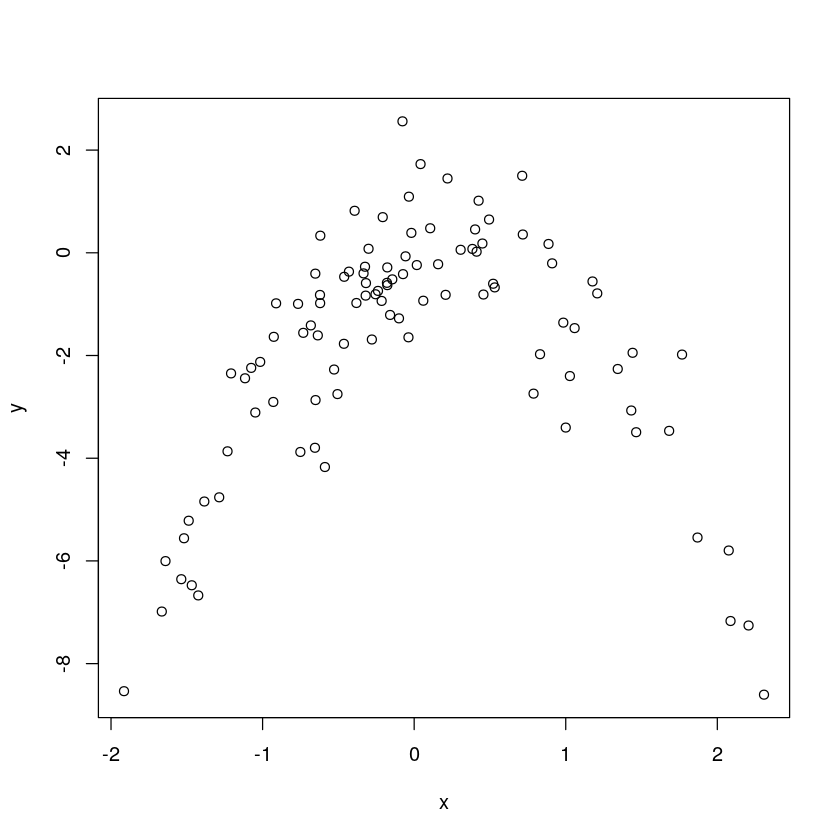

In [25]:
plot(x, y)
#Quadratic plot. X from about -2 to 2. Y from about -8 to 2.

In [26]:
# c
library(boot)
Data = data.frame(x, y)
set.seed(1)
# i.
glm.fit = glm(y ~ x)
cv.glm(Data, glm.fit)$delta

[1] 5.890979 5.888812

In [27]:
# ii.
glm.fit = glm(y ~ poly(x, 2))
cv.glm(Data, glm.fit)$delta

[1] 1.086596 1.086326

In [28]:
# iii.
glm.fit = glm(y ~ poly(x, 3))
cv.glm(Data, glm.fit)$delta

[1] 1.102585 1.102227

In [29]:
# iv.
glm.fit = glm(y ~ poly(x, 4))
cv.glm(Data, glm.fit)$delta

[1] 1.114772 1.114334

In [30]:
# d
set.seed(10)
# i.
glm.fit = glm(y ~ x)
cv.glm(Data, glm.fit)$delta

[1] 5.890979 5.888812

In [31]:
# ii.
glm.fit = glm(y ~ poly(x, 2))
cv.glm(Data, glm.fit)$delta

[1] 1.086596 1.086326

In [32]:
# iii.
glm.fit = glm(y ~ poly(x, 3))
cv.glm(Data, glm.fit)$delta

[1] 1.102585 1.102227

In [33]:
# iv.
glm.fit = glm(y ~ poly(x, 4))
cv.glm(Data, glm.fit)$delta

[1] 1.114772 1.114334

In [34]:
# Exact same, because LOOCV will be the same since it evaluates n folds of a single observation.

In [35]:
# e
# The quadratic polynomial had the lowest LOOCV test error rate. This was expected because it matches the true form of Y


In [37]:
#f 
summary(glm.fit)

# p-values show statistical significance of linear and quadratic terms, which agrees with the CV results.


Call:
glm(formula = y ~ poly(x, 4))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8914  -0.5244   0.0749   0.5932   2.7796  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.8277     0.1041 -17.549   <2e-16 ***
poly(x, 4)1   2.3164     1.0415   2.224   0.0285 *  
poly(x, 4)2 -21.0586     1.0415 -20.220   <2e-16 ***
poly(x, 4)3  -0.3048     1.0415  -0.293   0.7704    
poly(x, 4)4  -0.4926     1.0415  -0.473   0.6373    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 1.084654)

    Null deviance: 552.21  on 99  degrees of freedom
Residual deviance: 103.04  on 95  degrees of freedom
AIC: 298.78

Number of Fisher Scoring iterations: 2


In [38]:
poly(x, 4)

1,2,3,4
-6.112394e-02,-0.02836730,0.087665421,-0.046434867
8.385880e-03,-0.08297878,0.002724365,0.085308416
-9.160991e-02,0.02012996,0.079015266,-0.111004395
2.054784e-02,-0.08453630,-0.019251139,0.089971975
-6.471420e-02,-0.02343339,0.088597726,-0.055232669
1.893965e-01,0.13992855,-0.004158406,-0.150776981
7.916622e-02,-0.05863638,-0.113902630,0.014518174
9.946538e-02,-0.03676884,-0.132057392,-0.039777592
4.427692e-02,-0.08071782,-0.061906713,0.078050306
1.804663e-01,0.11655830,-0.037219276,-0.169981299


In [39]:
# 9

library(MASS)
summary(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [40]:
set.seed(1)
attach(Boston)

In [41]:
# a
medv.mean = mean(medv)
medv.mean

[1] 22.53281

In [42]:
# b 
medv.err = sd(medv)/sqrt(length(medv))
medv.err


[1] 0.4088611

In [43]:
# c
boot.fn = function(data, index) return(mean(data[index]))
library(boot)
bstrap = boot(medv, boot.fn, 1000)
bstrap


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = medv, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
    original      bias    std. error
t1* 22.53281 0.007650791   0.4106622

In [44]:
# Similar to answer from (b) up to two significant digits. (0.4119 vs 0.4089)

In [45]:
#d 
t.test(medv)


	One Sample t-test

data:  medv
t = 55.111, df = 505, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 21.72953 23.33608
sample estimates:
mean of x 
 22.53281 


In [46]:
c(bstrap$t0 - 2 * 0.4119, bstrap$t0 + 2 * 0.4119)

[1] 21.70901 23.35661

In [47]:
# Bootstrap estimate only 0.02 away for t.test estimate.

In [48]:
# e

medv.med = median(medv)
medv.med

[1] 21.2

In [49]:
# g 
medv.tenth = quantile(medv, c(0.1))
medv.tenth

10% 
12.75

In [50]:
#h 
boot.fn = function(data, index) return(quantile(data[index], c(0.1)))
boot(medv, boot.fn, 1000)



ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = medv, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
    original  bias    std. error
t1*    12.75 0.01455   0.4823468